In [1]:
import pandas as pd
import plotly.graph_objs as go #라벨도 보여주는 interactive한 그래프
import plotly.offline as py
from fbprophet import Prophet #페이스북에서 만든 시계열예측 위한 패키지.
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
py.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving 005930.KS.csv to 005930.KS.csv


In [34]:
data = pd.read_csv('005930.KS.csv')
df_samsung = data.drop([data.columns[1],data.columns[2],data.columns[3],data.columns[4],data.columns[5],data.columns[6]],axis=1)
df_samsung.head()

,Date
0,2019-03-04
1,2019-03-05
2,2019-03-06
3,2019-03-07
4,2019-03-08


In [37]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2
#print(mid_prices)
df_samsung['mid_prices'] = mid_prices
df_samsung.head()

,Date,mid_prices
0,2019-03-04,45450.0
1,2019-03-05,44625.0
2,2019-03-06,44000.0
3,2019-03-07,44175.0
4,2019-03-08,44300.0


In [52]:
##Plot
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_samsung.Date, #x축에 날짜
        y = df_samsung.mid_prices, #y축에 누적 확진자 수
        name = 'Samsung '
    )
)
fig

In [39]:
df_prophet = df_samsung.rename(columns={
    'Date': 'ds',
    'mid_prices':'y'
})

df_prophet.head()
df_prophet.tail()

,ds,y
243,2020-02-25,57100.0
244,2020-02-26,56500.0
245,2020-02-27,56200.0
246,2020-02-28,54850.0
247,2020-03-02,54550.0


In [48]:
#Create a Model
m = Prophet(
    changepoint_prior_scale=0.2, #increasing it will make the trend more flexible
    #값이 커질수록 모델을 유연하게 만듦
    changepoint_range = 0.98, #place potential changepoints in the first 98% of the time series
    #데이터 앞쪽 몇 퍼센트 부분안에서 변화점(변곡점)을 만들것인지 설정.
    #changepoint에 관한 문서 : https://facebook.github.io/prophet/docs/trend_changepoints.html
    yearly_seasonality = False, #연별 트렌드분석 x
    weekly_seasonality=False, #주별 트렌드분석 x
    daily_seasonality=True, #데일리 트렌드 분석 o
    seasonality_mode='additive' #계절 변동의 영향이 트렌드에 더해지는 형태.
                          # 곱해지는 형태일 때는 multiplicative
)

m.fit(df_prophet)

future = m.make_future_dataframe(periods=20) #예측할 기간동안의 데이터 저장 공간을 미리 확보.

future.tail(20)

,ds
248,2020-03-03
249,2020-03-04
250,2020-03-05
251,2020-03-06
252,2020-03-07
253,2020-03-08
254,2020-03-09
255,2020-03-10
256,2020-03-11
257,2020-03-12


In [49]:
#Predict
forecast = m.predict(future)

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(20) #ds:날짜, yhat:예측값, lower:오차를 고려한 예측 최소값, upper:오차 고려 예측 최대값


,ds,yhat,yhat_lower,yhat_upper
248,2020-03-03,56377.572531,54952.695249,57886.551869
249,2020-03-04,56207.184076,54870.674126,57397.728350
250,2020-03-05,56036.795621,54681.804956,57403.417214
251,2020-03-06,55866.407166,54616.174868,57237.522757
252,2020-03-07,55696.018710,54322.845897,56915.950150
253,2020-03-08,55525.630255,54179.759649,56839.051139
254,2020-03-09,55355.241800,53910.005342,56726.754771
255,2020-03-10,55184.853345,53711.840470,56706.235524
256,2020-03-11,55014.464889,53731.294553,56471.365828
257,2020-03-12,54844.076434,53530.265420,56270.852764


In [50]:
#Plot Prediction
fig = plot_plotly(m, forecast)
py.iplot(fig)

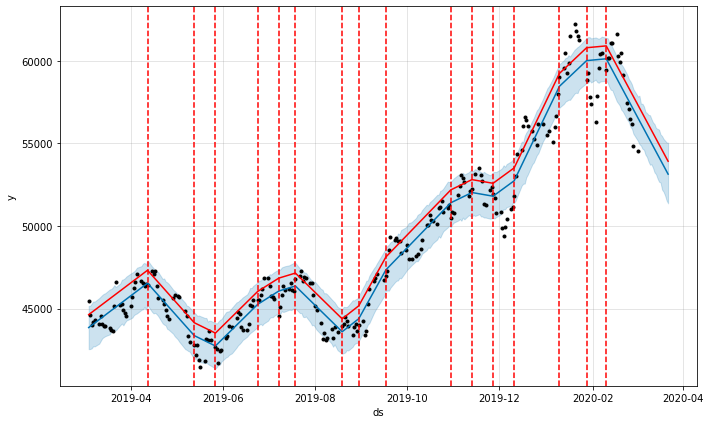

In [51]:
#Plot changepoints
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)